<a href="https://colab.research.google.com/github/Sabique-Islam/ML-Insights/blob/main/HealthCare_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==1.2.2 --no-cache-dir

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 96.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.


In [4]:
import numpy as np
import pandas as pd
import sklearn

print(sklearn.__version__) # make sure its 1.2.2

1.2.2


In [5]:
import os
for dirname, _, filenames in os.walk('/content/healthcare_dataset.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
df = pd.read_csv('/content/healthcare_dataset.csv')
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [7]:
df.info()
df.describe()
df.describe(include = object) # gives complete info about the categorial columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
count,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500
unique,49992,2,8,6,1827,40341,39876,5,3,1856,5,3
top,DAvId muNoZ,Male,A-,Arthritis,2024-03-16,Michael Smith,LLC Smith,Cigna,Elective,2020-03-15,Lipitor,Abnormal
freq,3,27774,6969,9308,50,27,44,11249,18655,53,11140,18627


In [8]:
df['Admit_Period'] = (pd.to_datetime(df['Discharge Date']) - pd.to_datetime(df['Date of Admission'])).dt.days
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Admit_Period
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,15
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,30
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,20


In [9]:
df.describe()

,Age,Billing Amount,Room Number,Admit_Period
count,55500.000000,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829,15.509009
std,19.602454,14211.454431,115.243069,8.659600
min,13.000000,-2008.492140,101.000000,1.000000
25%,35.000000,13241.224652,202.000000,8.000000
50%,52.000000,25538.069376,302.000000,15.000000
75%,68.000000,37820.508436,401.000000,23.000000
max,89.000000,52764.276736,500.000000,30.000000


In [10]:
df = df.loc[:, ['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider',
               'Billing Amount', 'Admission Type', 'Medication', 'Admit_Period','Test Results']]
df.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Admit_Period,Test Results
0,30,Male,B-,Cancer,Blue Cross,18856.281306,Urgent,Paracetamol,2,Normal
1,62,Male,A+,Obesity,Medicare,33643.327287,Emergency,Ibuprofen,6,Inconclusive
2,76,Female,A-,Obesity,Aetna,27955.096079,Emergency,Aspirin,15,Normal
3,28,Female,O+,Diabetes,Medicare,37909.782410,Elective,Ibuprofen,30,Abnormal
4,43,Female,AB+,Cancer,Aetna,14238.317814,Urgent,Penicillin,20,Abnormal


<Axes: >

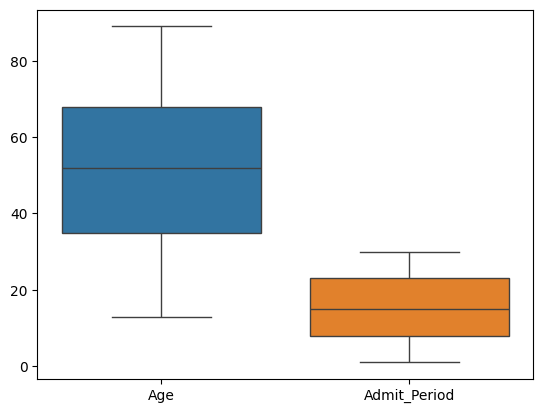

In [11]:
import seaborn as sns
sns.boxplot(df[['Age','Admit_Period']])

<ipython-input-12-f52339967cae>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_melted, x='Variable', y='Value', palette=['teal', 'orange'])


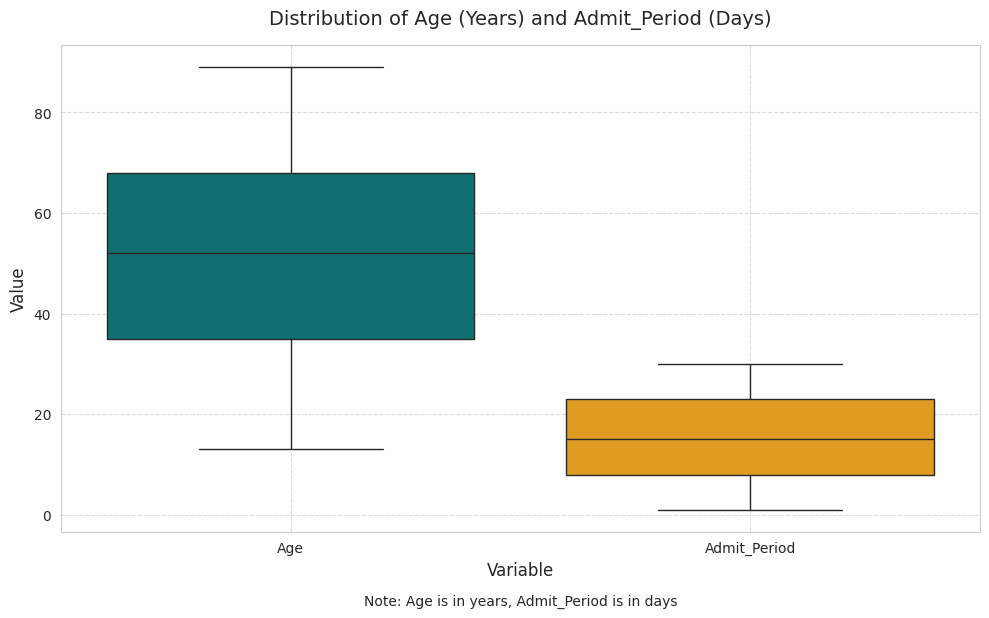

In [12]:
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

df_melted = df.melt(value_vars=['Age', 'Admit_Period'], var_name='Variable', value_name='Value')

plt.figure(figsize=(10, 6))

sns.boxplot(data=df_melted, x='Variable', y='Value', palette=['teal', 'orange'])

plt.title('Distribution of Age (Years) and Admit_Period (Days)', fontsize=14, pad=15)
plt.ylabel('Value', fontsize=12)
plt.xlabel('Variable', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.text(0.5, -0.15, 'Note: Age is in years, Admit_Period is in days', transform=plt.gca().transAxes, ha='center', fontsize=10)

plt.show()

In [13]:
df

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Admit_Period,Test Results
0,30,Male,B-,Cancer,Blue Cross,18856.281306,Urgent,Paracetamol,2,Normal
1,62,Male,A+,Obesity,Medicare,33643.327287,Emergency,Ibuprofen,6,Inconclusive
2,76,Female,A-,Obesity,Aetna,27955.096079,Emergency,Aspirin,15,Normal
3,28,Female,O+,Diabetes,Medicare,37909.782410,Elective,Ibuprofen,30,Abnormal
4,43,Female,AB+,Cancer,Aetna,14238.317814,Urgent,Penicillin,20,Abnormal
...,...,...,...,...,...,...,...,...,...,...
55495,42,Female,O+,Asthma,Blue Cross,2650.714952,Elective,Penicillin,30,Abnormal
55496,61,Female,AB-,Obesity,Cigna,31457.797307,Elective,Aspirin,9,Normal
55497,38,Female,B+,Hypertension,UnitedHealthcare,27620.764717,Urgent,Ibuprofen,28,Abnormal
55498,43,Male,O-,Arthritis,Medicare,32451.092358,Elective,Ibuprofen,6,Abnormal


In [14]:
df['Medical Condition'].value_counts()

,count
Medical Condition,
Arthritis,9308
Diabetes,9304
Hypertension,9245
Obesity,9231
Cancer,9227
Asthma,9185


In [15]:
df['Medication'].value_counts()

,count
Medication,
Lipitor,11140
Ibuprofen,11127
Aspirin,11094
Paracetamol,11071
Penicillin,11068


In [16]:
df['Admission Type'].value_counts()

,count
Admission Type,
Elective,18655
Urgent,18576
Emergency,18269


Encoding strings

In [17]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [18]:
df = pd.get_dummies(data = df, columns = ['Gender'])
le = LabelEncoder()
oe = OrdinalEncoder()

In [19]:
df['Test Results'] = le.fit_transform(df['Test Results'])

In [20]:
df_column = df.select_dtypes(object).columns
df_column

Index(['Blood Type', 'Medical Condition', 'Insurance Provider',
       'Admission Type', 'Medication'],
      dtype='object')

In [21]:
df[df_column] = oe.fit_transform(df[df_column])
df

,Age,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Admit_Period,Test Results,Gender_Female,Gender_Male
0,30,5.0,2.0,1.0,18856.281306,2.0,3.0,2,2,False,True
1,62,0.0,5.0,3.0,33643.327287,1.0,1.0,6,1,False,True
2,76,1.0,5.0,0.0,27955.096079,1.0,0.0,15,2,True,False
3,28,6.0,3.0,3.0,37909.782410,0.0,1.0,30,0,True,False
4,43,2.0,2.0,0.0,14238.317814,2.0,4.0,20,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...
55495,42,6.0,1.0,1.0,2650.714952,0.0,4.0,30,0,True,False
55496,61,3.0,5.0,2.0,31457.797307,0.0,0.0,9,2,True,False
55497,38,4.0,4.0,4.0,27620.764717,2.0,1.0,28,0,True,False
55498,43,7.0,0.0,3.0,32451.092358,0.0,1.0,6,0,False,True


In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [23]:
df[df['Billing Amount']<0]

,Age,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Admit_Period,Test Results,Gender_Female,Gender_Male
132,32,3.0,2.0,0.0,-502.507813,2.0,4.0,18,2,True,False
799,49,3.0,1.0,0.0,-1018.245371,0.0,4.0,21,1,True,False
1018,60,0.0,4.0,0.0,-306.364925,0.0,1.0,21,2,False,True
1421,74,6.0,1.0,1.0,-109.097122,1.0,1.0,20,0,True,False
2103,72,5.0,3.0,1.0,-576.727907,2.0,0.0,27,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...
52894,23,3.0,3.0,1.0,-353.865186,0.0,2.0,12,1,False,True
53204,55,0.0,4.0,0.0,-306.364925,0.0,1.0,21,2,False,True
53232,68,4.0,4.0,0.0,-591.917419,0.0,2.0,2,0,True,False
54136,64,6.0,2.0,4.0,-199.663795,2.0,1.0,12,0,False,True


In [24]:
df['Billing Amount'] = df['Billing Amount'].abs()
df[df['Billing Amount']<0] #no output hence no -ve

,Age,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Admit_Period,Test Results,Gender_Female,Gender_Male


In [25]:
x = df[['Age', 'Blood Type', 'Medical Condition', 'Insurance Provider','Billing Amount', 'Admission Type', 'Medication', 'Admit_Period','Gender_Female', 'Gender_Male']]
y = df['Test Results']

In [26]:
x,y

(       Age  Blood Type  Medical Condition  Insurance Provider  Billing Amount  \
 0       30         5.0                2.0                 1.0    18856.281306   
 1       62         0.0                5.0                 3.0    33643.327287   
 2       76         1.0                5.0                 0.0    27955.096079   
 3       28         6.0                3.0                 3.0    37909.782410   
 4       43         2.0                2.0                 0.0    14238.317814   
 ...    ...         ...                ...                 ...             ...   
 55495   42         6.0                1.0                 1.0     2650.714952   
 55496   61         3.0                5.0                 2.0    31457.797307   
 55497   38         4.0                4.0                 4.0    27620.764717   
 55498   43         7.0                0.0                 3.0    32451.092358   
 55499   53         6.0                0.0                 0.0     4010.134172   
 
        Admiss

In [27]:
test = SelectKBest(score_func = chi2 , k = 10)
result = test.fit(x,y)
set_printoptions(precision = 3)
r = result.scores_
print(result.scores_)
c = x.columns
results = pd.DataFrame(data = r, index = c )
results

[2.758e+01 1.366e+00 3.743e-01 6.104e+00 1.010e+04 4.543e-01 9.380e-01
 3.667e+00 1.010e+00 1.008e+00]


,0
Age,27.581169
Blood Type,1.365680
Medical Condition,0.374319
Insurance Provider,6.104467
Billing Amount,10103.069599
Admission Type,0.454308
Medication,0.938025
Admit_Period,3.667347
Gender_Female,1.010048
Gender_Male,1.008303


In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [29]:
std = StandardScaler()
xdf = std.fit_transform(x)

In [30]:
pca = PCA()
pcaxdf = pca.fit_transform(xdf)
pcaxdf

array([[-1.430e+00,  4.900e-01,  9.461e-01, ..., -6.894e-01, -7.688e-01,
         2.352e-16],
       [-1.402e+00,  1.190e+00,  1.321e+00, ...,  4.301e-02,  1.120e+00,
        -1.764e-16],
       [ 1.426e+00,  1.048e+00, -4.745e-01, ..., -1.709e-01, -2.583e-01,
        -1.600e-15],
       ...,
       [ 1.399e+00, -6.578e-01,  1.248e+00, ...,  1.472e+00, -1.156e+00,
         4.448e-18],
       [-1.382e+00,  2.249e-01, -1.369e-01, ..., -8.963e-01,  8.485e-01,
         5.435e-18],
       [ 1.406e+00, -1.937e+00, -9.919e-01, ..., -7.506e-01, -2.223e+00,
         2.037e-17]])

In [31]:
pca.explained_variance_

array([2.000e+00, 1.018e+00, 1.012e+00, 1.009e+00, 1.000e+00, 9.979e-01,
       9.932e-01, 9.899e-01, 9.800e-01, 2.496e-32])

In [32]:
var = pca.explained_variance_ratio_
var1 = np.cumsum(np.round(var, decimals = 4)*100)
var1

array([ 20.  ,  30.18,  40.3 ,  50.39,  60.39,  70.37,  80.3 ,  90.2 ,
       100.  , 100.  ])

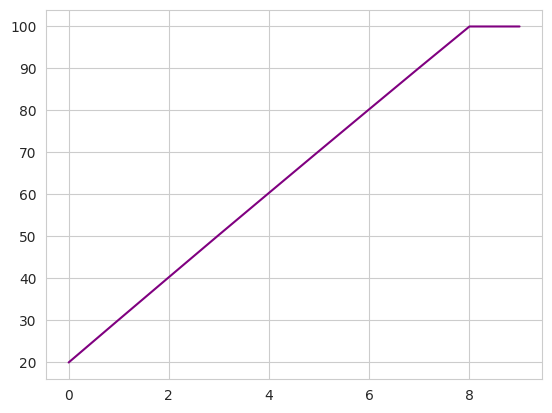

In [33]:
import matplotlib.pyplot as plt
plt.plot(var1, color = 'purple')

In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [35]:
kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)
HM = AdaBoostClassifier(n_estimators = 10, random_state = 7)
result = cross_val_score(HM, x,y, cv = kfold)
result

array([0.329, 0.34 , 0.338, 0.341, 0.338, 0.337, 0.337, 0.335, 0.334,
       0.33 ])

In [37]:
param_grid = {'n_estimators': [i*10 for i in range(1, 10) ]}

grid_search = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x, y)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90]},
             scoring='accuracy')